[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/abiraihan/geoshapes.git/master)
[![Project Status: Active – The project has reached a stable, usable state and is being actively developed.](https://www.repostatus.org/badges/latest/active.svg)](https://www.repostatus.org/#active)
[![PyPI version](https://badge.fury.io/py/geoshapes.svg)](https://badge.fury.io/py/geoshapes)

## splitShape

In [1]:
import shapely, geopandas
from geoshapes import splitShape
%matplotlib inline

In [2]:
pointLocation = shapely.geometry.Point(0.0,0.0)

### splitCircle
See **help(splitShape.splitCircle)** for more details about the parameters
1. splitCircle require a shapely Point (geoms) feature to create split geometry from that location.
2. splitCircle require a radius length (circleRadius) for creating circle feature from the given location.

In [3]:
#help(splitShape.splitCircle)

In [4]:
circle = splitShape.splitCircle(
    geoms = pointLocation,
    circleRadius = 50,
    incrementDegree = 5,
    clipInterior = True,
    innerWidth = 30,
    getGeom = 'Both')

<AxesSubplot:>

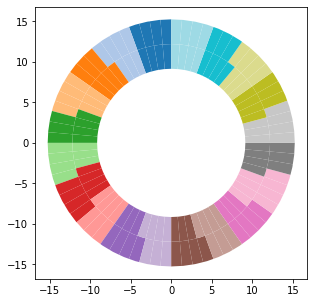

In [5]:
gdf = geopandas.GeoDataFrame(geometry = circle)
gdf.plot(figsize = (5, 5), cmap = 'tab20')

<AxesSubplot:>

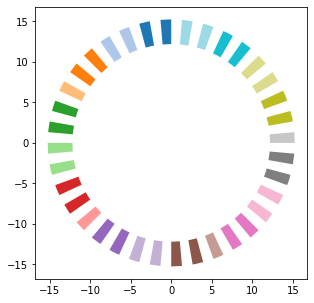

In [6]:
gdf = geopandas.GeoDataFrame(geometry = circle[::4])
gdf.plot(figsize = (5, 5), cmap = 'tab20')

<AxesSubplot:>

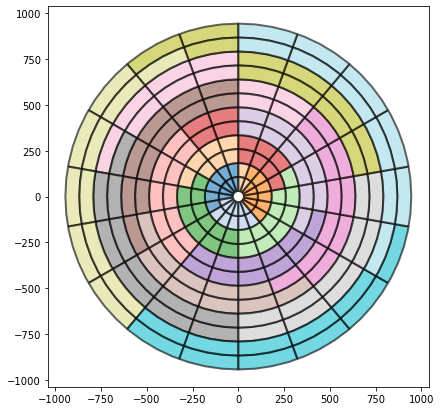

In [7]:
radius = 3000
innerClip = 100
stepWise = 500
mergedData = geopandas.GeoDataFrame()
for i in range (innerClip, radius, stepWise):
    circle = splitShape.splitCircle(
        geoms = pointLocation,
        circleRadius = i+stepWise,
        incrementDegree = 20,
        clipInterior = True,
        innerWidth = i,
        getGeom = 'Both')
    circleGeo = geopandas.GeoDataFrame(geometry = circle[::None])
    mergedData = mergedData.append(circleGeo)
mergedData.reset_index(drop = True, inplace = True)
mergedData.plot(
    figsize = (7,7), alpha = 0.6,
    cmap = 'tab20', edgecolor = 'k',
    linewidth = 2)

In [8]:
def getTreatment(radius, innerClip, stepWise, skip = 4):
    mergedData = geopandas.GeoDataFrame()
    for i in range (innerClip, radius, stepWise):
        circle = splitShape.splitCircle(
            geoms = pointLocation,
            circleRadius = i+stepWise,
            incrementDegree = 20,
            clipInterior = True,
            innerWidth = i,
            getGeom = 'Both')
        circleGeo = geopandas.GeoDataFrame(geometry = circle[::int(skip)])
        mergedData = mergedData.append(circleGeo)

    mergedData.reset_index(drop = True, inplace = True)
    mergedData['ids'] = range(len(mergedData))
    ax = mergedData.plot(
        figsize = (7,7), alpha = 0.6,
        cmap = 'tab20', edgecolor = 'k',
        linewidth = 2)
    mergedData.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return mergedData

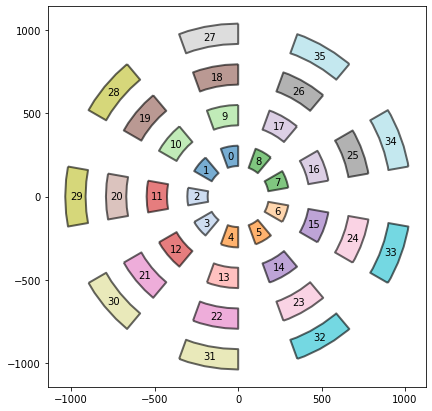

In [9]:
plots = getTreatment(3000, 200, 800, 4)

### splitLatin
See **help(splitShape.splitLatin)** for more details about the parameters
1. split a treatment plot require a point location
2. split a treatment plot require a side length for the latin design experimental treatment

In [10]:
#help(splitShape.splitLatin)

In [11]:
latin = splitShape.splitLatin(
    geoms = pointLocation,
    bufferLength = 50)
latinGeo = geopandas.GeoDataFrame(geometry = latin)

<AxesSubplot:>

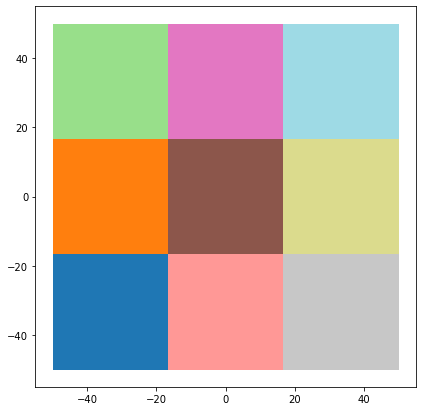

In [12]:
latinGeo.plot(cmap = 'tab20', figsize = (7,7))

In [13]:
def getPlot(sideLength, maxVal, step, skip = None):

    multiPoint = [shapely.geometry.Point(float(i), float(i+50)) for i in range(0, maxVal, step)]
    mergedLatin = geopandas.GeoDataFrame()
    for i in multiPoint:
        latin = splitShape.splitLatin(
            geoms = i,
            bufferLength = sideLength)
        latinGeo = geopandas.GeoDataFrame(geometry = latin[::skip])
        mergedLatin = mergedLatin.append(latinGeo)
    mergedLatin.reset_index(drop = True, inplace = True)

    mergedLatin['ids'] = range(len(mergedLatin))
    ax = mergedLatin.plot(figsize = (7,7), alpha = 0.6, cmap = 'tab20', edgecolor = 'k', linewidth = 2)
    mergedLatin.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return mergedLatin

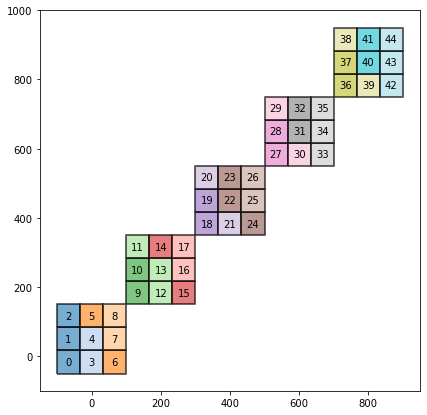

In [14]:
latinData = getPlot(100, 1000, 200)

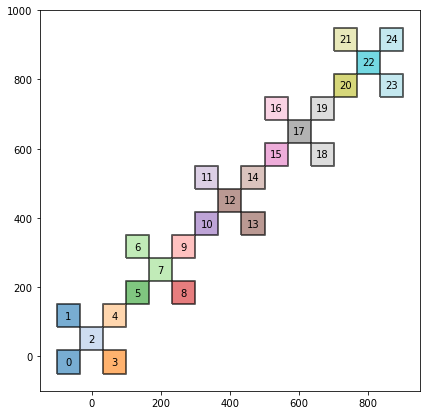

In [15]:
latinData1 = getPlot(100, 1000, 200, 2)

### splitCircleSquare
See **help(splitShape.splitCircleSquare)** for more details about the parameters
1. splitCircleSquare requires shapely Point location to place the treatment plot
2. splitCircleSquare requires length of radius in feet for the circle to create
3. splitCircleSquare requires rotation angle for the square in the circle for treatment placing,Its optional and default is 45

In [16]:
#help(splitShape.splitCircleSquare)

<AxesSubplot:>

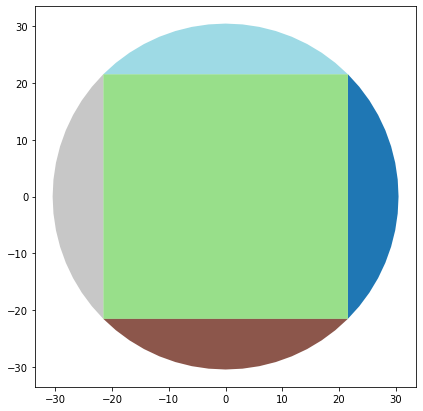

In [17]:
splitFeature = splitShape.splitCircleSquare(
    geoms = pointLocation,
    circleRadius = 100,
    rotation = 45
)
gdfFeature = geopandas.GeoDataFrame(geometry = splitFeature)
gdfFeature.plot(cmap = 'tab20', figsize = (7,7))

In [18]:
def getCircleSquarePlot(sideLength, rotations, maxVal, step, skip = None):

    multiPoint = [shapely.geometry.Point(float(i), float(i+50)) for i in range(0, maxVal, step)]
    mergedLatin = geopandas.GeoDataFrame()
    for i in multiPoint:
        latin = splitShape.splitCircleSquare(
            geoms = i,
            circleRadius = sideLength,
            rotation = rotations)
        latinGeo = geopandas.GeoDataFrame(geometry = latin[::skip])
        mergedLatin = mergedLatin.append(latinGeo)
    mergedLatin.reset_index(drop = True, inplace = True)

    mergedLatin['ids'] = range(len(mergedLatin))
    ax = mergedLatin.plot(figsize = (7,7), alpha = 0.6, cmap = 'tab20', edgecolor = 'k', linewidth = 2)
    mergedLatin.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return mergedLatin

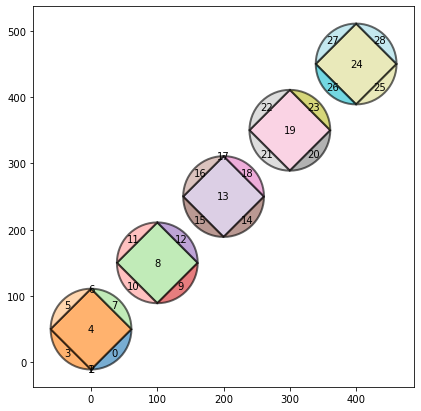

In [19]:
circleSquare = getCircleSquarePlot(200, 90, 500, 100)

### splitSquare
See **help(splitShape.splitSquare)** for more details about the parameters
1. splitSquare requires shapely Point location to place the treatment plot
2. splitSquare requires side length of radius in feet for the squre to create
3. splitSquare requires rotation angle for the square for treatment placing, Its optional and default is 45
4. splitSquare requires to either include interior squre polygon to include or exclude, default is True which includes interior geometry

In [20]:
!help(splitShape.splitSquare)

/bin/bash: -c: line 0: syntax error near unexpected token `splitShape.splitSquare'
/bin/bash: -c: line 0: `help(splitShape.splitSquare)'


<AxesSubplot:>

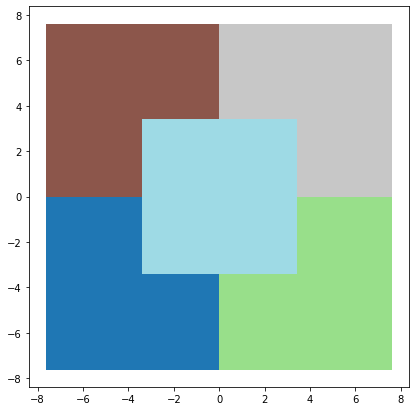

In [21]:
splitgeometry = splitShape.splitSquare(pointLocation, 50, 90)
squareGeoms = geopandas.GeoDataFrame(geometry = splitgeometry)
squareGeoms.plot(figsize = (7,7), cmap = 'tab20')

In [22]:
def getSquarePlot(sideLength, rotations, maxVal, step, include = True, skip = None):

    multiPoint = [shapely.geometry.Point(float(i), float(i+50)) for i in range(0, maxVal, step)]
    mergedLatin = geopandas.GeoDataFrame()
    for i in multiPoint:
        latin = splitShape.splitSquare(
            geoms = i,
            sideLength = sideLength,
            rotation = rotations,
            includeInterior = include)
        latinGeo = geopandas.GeoDataFrame(geometry = latin[::skip])
        mergedLatin = mergedLatin.append(latinGeo)
    mergedLatin.reset_index(drop = True, inplace = True)

    mergedLatin['ids'] = range(len(mergedLatin))
    ax = mergedLatin.plot(figsize = (7,7), alpha = 0.6, cmap = 'tab20', edgecolor = 'k', linewidth = 2)
    mergedLatin.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return mergedLatin

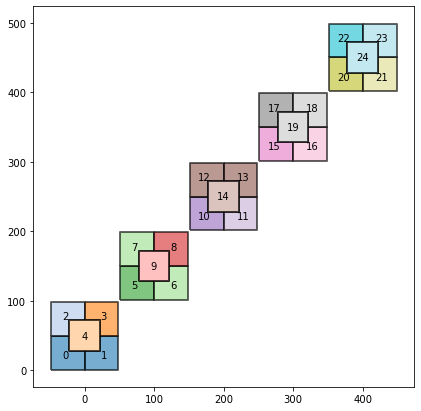

In [23]:
squarePlot = getSquarePlot(320, 90, 500, 100)

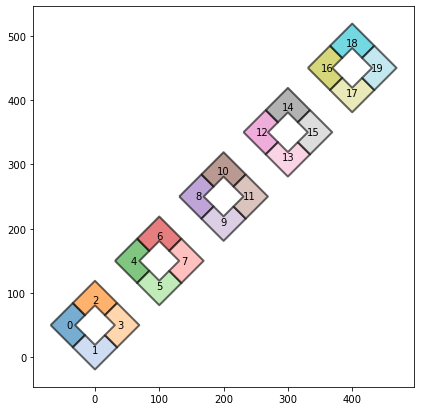

In [24]:
squarePlot1 = getSquarePlot(320, 45, 500, 100, include = False, skip = None)

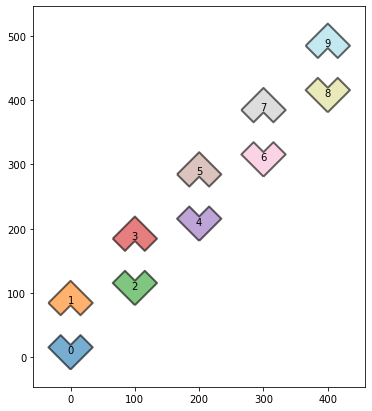

In [25]:
squarePlot1 = getSquarePlot(320, 135, 500, 100, include = False, skip = 3)

### splitGeom
See **help(splitShape.splitGeom)** for more details about the parameters
1. splitGeom requires shapely Polygon geometry to split a given polygon geometry
2. splitGeom requires number of splits to split polygon geometry
3. splitGeom requires rotation angle to find the major axis to split polygon geometry, Its optional and default is 30

In [26]:
#help(splitShape.splitGeom)

<AxesSubplot:>

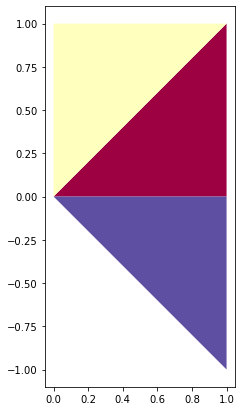

In [27]:
polys = [shapely.geometry.Polygon([(0, 0), (1, 1), (1, 0)]),
         shapely.geometry.Polygon([(0, 0), (1, 1), (0, 1)]),
         shapely.geometry.Polygon([(0, 0), (1, -1), (1, 0)])
        ]
polysGeo = geopandas.GeoDataFrame(geometry = polys)
polysGeo.plot(cmap = 'Spectral', figsize = (7,7))

<AxesSubplot:>

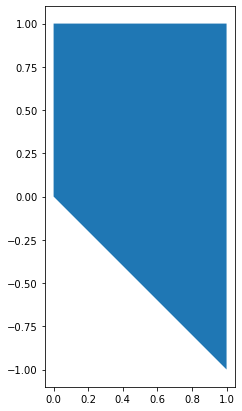

In [28]:
geomUnion = shapely.ops.unary_union(polys)
polysGeos = geopandas.GeoDataFrame(geometry = [geomUnion])
polysGeos.plot(cmap = 'tab20', figsize = (7, 7))

In [29]:
def getSplitedGeoms(geoms, split, rotation):
    
    splitGeometry = splitShape.splitGeom(geoms, split, rotation = rotation)
    splitGeometry['ids'] = range(len(splitGeometry))
    ax = splitGeometry.plot(figsize = (7,7), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
    splitGeometry.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return splitGeometry

  -- Found rotation angle 120 degree
  -- Analyzing suitable radians for the major axis at 120 degree
  -- Analyzing Polygon Rotation is completed
  -- Major Axis Identified Successfully
  -- Point location for polygon geometry identified successfully
  -- Geometry splited successfully and polygon defined accordingly
  -- Number of Splited Polygon before merge : 10


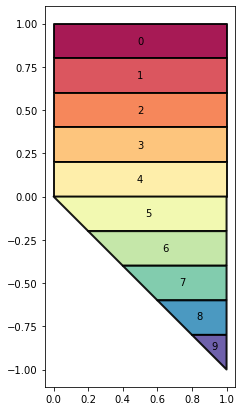

In [30]:
splitedGeoms = getSplitedGeoms(geomUnion, 10, 120)

  -- Found rotation angle 120 degree
  -- Analyzing suitable radians for the major axis at 120 degree
  -- Analyzing Polygon Rotation is completed
  -- Major Axis Identified Successfully
  -- Point location for polygon geometry identified successfully
  -- Geometry splited successfully and polygon defined accordingly
  -- Number of Splited Polygon before merge : 18


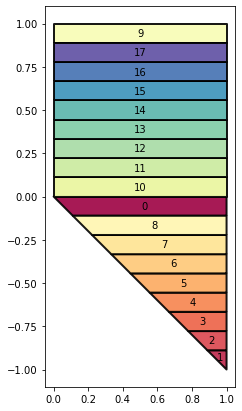

In [31]:
splitedGeoms = getSplitedGeoms(geomUnion, 18, 120)